

---



# **Microbioma de suelos.**

## Karol Salazar Barrantes.



---



# **Descripción del proyecto y justificación:**

La metagenómica es una herramienta que permite conocer la diversidad de microorganismos y sus funciones, sin la necesidad de cultivarlos, considerando que solo un porcentaje muy pequeño se puede cultivar en un laboratorio. Esto permite analizar el microbioma de muestras ambientales, como el suelo. Los suelos se han investigado siempre en función de sus características físicas y químicas; pero, hasta hace algunos años se han reportado estudios que involucran la comprensión de la dinámica de los microorganismos del suelo. Realizar estudios metagenómicos de una muestra ambiental involucra analizar gran cantidad de secuencias de material genético, por lo que se necesita implementar métodos para lograr sacar el mayor provecho a esa información, por ejemplo, por medio de bibliotecas de Python. Este proyecto consiste en descargar un dataset con información de microbioma de suelos de Finlandia, para filtrar la información más importante, analizarla y comparar los datos con resultados obtenidos en un proyecto de investigación propia.

# **Antecedentes:**
El análisis de las características, taxonomía y ecología de los microorganismos en muestras ambientales, se ha logrado de manera más eficiente mediante los avances en la secuenciación y la bioinformática. Estos conocimientos pueden ser una herramienta para brindar puntuaciones de calidad del suelo, como se muestra en los resultados obtenidos por **Hermans et al. (2020)**, en donde se analizaron 3000 muestras de suelo de 606 sitios de Nueva Zelanda. Además, en este tipo de investigaciones, no solo es importante la información obtenida a partir de las secuencias del material genético, por el contrario, se vuelve más informativa en conjunto con metadatos, que incluyan descripciones, características y otros tipos de procesamientos de muestras, por ejemplo, datos de análisis fisicoquímicos, condiciones ambientales, tipo de muestra, tratamientos, entre otros. Un estudio realizado en diferentes tipos de usos de suelos de países europeos, determinó diferencias significativas en las estructuras de la comunidad de bacterias y que es explicado en gran parte por las propiedades del suelo en relación con su pH, contenido total de carbón y textura **(Plassart et al., 2019)**. La ciencia de datos permite filtrar y limpiar las secuencias de ADN, transformar esa información mediante bases de datos, analizar, visualizar los datos y aplicar estadísticas. Algunos de los métodos utilizados por **Berihu et al. (2023)**, en función de seleccionar taxones beneficiosos del suelo para los cultivos, fueron filtrar los datos de la secuenciación, eliminando secuencias de baja calidad. Después, se utilizó una base de datos de proteínas de NCBI (National Center for Biotechnology Information) para asignar anotaciones de funciones. Con estos datos se desarrolló un método de simulación de las actividades metabólicas. Además, se aplicó estadística y se visualizaron los datos mediante gráficos de análisis de coordenadas principales. Los aportes a la información generada sobre el microbioma del suelo, como se mencionó anteriormente, puede ser por medio de análisis de un conjunto de muestras de un estudio en específico, pero también puede estar enfocado en crear bases de datos a partir de otras bases de datos, para de esta manera tener referencias específicas del suelo. **Edwin et al. (2024)**, unieron información de bases de datos de NCBI y de RefSoil, para simular una comunidad, mediante genomas que son comunes en ecosistemas del suelo.


# **Descipción del problema:**
¿Es posible filtrar la información del dataset "Soil metagenome from healthy and unhealthy agricultural soil" para analizar, comparar y visualizar los datos más relevantes?

# **Objetivo:**
Analizar el dataset "Soil metagenome from healthy and unhealthy agricultural soil", mediante bibliotecas de aprendizaje automático, para la visualización de los taxones más relevantes y la comparación con otro estudio de metagenómica de suelos.

# **Descipción del conjunto de datos:**

El dataset "Soil metagenome from healthy and unhealthy agricultural soil" (MGnify, 2020), es un conjunto de datos sobre microbioma de suelos agrícolas de Finlandia, considerados saludables y no saludables, publicado en GBIF (Global Biodiversity Information Facility) el 04 de febrero del 2020 por la Universidad de Helsinki.

El mapa de Finlandia fue descargado en: [gadm.org](https://gadm.org/download_country.html)


La información de los grupos taxonómicos para realizar la comparación  corresponden a los resultados de una investigación (mi tesis en desarrollo) sobre bacterias de suelos de cafetales de Naranjo, que son considerados de calidad Baja y Media para el cultivo del café, según la zonificación agroecológica del Instituto Nacional de Tecnología Agropecuaria (INTA, 2019).
Mediante los análisis de la secuenciación de ADN de muestras de suelos, estos grupos taxonómicos son considerados bioindicadores de la calidad Baja y Media (p<0.05).




---



# **Código**

In [1]:
!pip install pandas
!pip install ydata-profiling

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

!pip install geodatasets
import geopandas as gpd
import geodatasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=cd49fc6872afe215b0bdbdfe1324dcda01871ab78472d8f77cdd995274eb6c56
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/soil_metagenome.csv', delimiter='\t') # delimiter='\t' para sets separados por tabulaciones


Mounted at /content/drive


In [ ]:
# Sumar valores faltantes
df.isna().sum()

gbifID                                  0
datasetKey                              0
occurrenceID                            0
kingdom                                 0
phylum                               1835
class                                3300
order                                4953
family                               8101
genus                               13247
species                             22109
infraspecificEpithet                25560
taxonRank                               0
scientificName                          0
verbatimScientificName                  0
verbatimScientificNameAuthorship    25560
countryCode                             0
locality                            25560
stateProvince                       25560
occurrenceStatus                        0
individualCount                     25560
publishingOrgKey                        0
decimalLatitude                         0
decimalLongitude                        0
coordinateUncertaintyInMeters     

In [ ]:
# Determinar la forma
df.shape

(25560, 50)

**Filtración**

In [ ]:
#----- Primer filtro -----

# Eliminar las columnas que todos sus valores sean NaN (25560)
print("Antes:", df.columns, "\n")

df = df.dropna(axis=1, how='all')

print("Después:", df.columns)

Antes: Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'infraspecificEpithet',
       'taxonRank', 'scientificName', 'verbatimScientificName',
       'verbatimScientificNameAuthorship', 'countryCode', 'locality',
       'stateProvince', 'occurrenceStatus', 'individualCount',
       'publishingOrgKey', 'decimalLatitude', 'decimalLongitude',
       'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation',
       'elevationAccuracy', 'depth', 'depthAccuracy', 'eventDate', 'day',
       'month', 'year', 'taxonKey', 'speciesKey', 'basisOfRecord',
       'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber',
       'identifiedBy', 'dateIdentified', 'license', 'rightsHolder',
       'recordedBy', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
       'mediaType', 'issue'],
      dtype='object') 

Después: Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
     

In [ ]:
# Creamos el informe
nombre = "Soil microbiome"
profile = ProfileReport(df, title=nombre, explorative=True)

# Mostrar el informe en un notebook
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Descargar el .htlm en la sección de carpetas
profile.to_file("Reporte.htlm")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:384: UserWarning: Extension .htlm not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#----- Segundo filtro -----

# Filtrar las columnas con información importante y diferente

print("Antes:", df.columns, "\n")

df = df[['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'taxonRank', 'scientificName',
       'countryCode', 'decimalLatitude', 'decimalLongitude',
         'eventDate', 'taxonKey', 'speciesKey', 'issue']]

print("Después:", df.columns)

Antes: Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'taxonRank', 'scientificName',
       'verbatimScientificName', 'countryCode', 'occurrenceStatus',
       'publishingOrgKey', 'decimalLatitude', 'decimalLongitude', 'eventDate',
       'day', 'month', 'year', 'taxonKey', 'speciesKey', 'basisOfRecord',
       'license', 'lastInterpreted', 'issue'],
      dtype='object') 

Después: Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'taxonRank', 'scientificName',
       'countryCode', 'decimalLatitude', 'decimalLongitude', 'eventDate',
       'taxonKey', 'speciesKey', 'issue'],
      dtype='object')


In [3]:
df.head(3)

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,3916717560,7585b2f0-0150-4409-985d-7b57832e3dca,MGYA00198885_Bacteria::Verrucomicrobia:Opituta...,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,Opitutaceae,Opitutus,NaN,...,NaN,NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2024-05-18T16:56:01.993Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...
1,3916717559,7585b2f0-0150-4409-985d-7b57832e3dca,MGYA00198894_Bacteria::Proteobacteria:Zetaprot...,Bacteria,Proteobacteria,Zetaproteobacteria,Mariprofundales,Mariprofundaceae,Mariprofundus,NaN,...,NaN,NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2024-05-18T16:56:01.993Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...
2,3916717558,7585b2f0-0150-4409-985d-7b57832e3dca,MGYA00198886_Bacteria::Actinobacteria:Actinoba...,Bacteria,Actinobacteriota,Actinomycetia,Actinomycetales,Microbacteriaceae,Leifsonia,NaN,...,NaN,NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2024-05-18T16:56:05.146Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...


**Categorización**

In [ ]:
# Crear una función para categorizar según el lugar de muestreo

def categorizar(fila):
  ID = fila["decimalLatitude"]

  if ID == 60.746:
    return "tipo_1"
  elif ID == 60.559:
    return "tipo_2"
  elif ID == 60.561:
    return "tipo_2"
  else:
    return "tipo_3"

# Aplicar la función a cada fila y agregar una nueva columna
df["Categoría"] = df.apply(categorizar, axis=1)
df

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,taxonRank,scientificName,countryCode,decimalLatitude,decimalLongitude,eventDate,taxonKey,speciesKey,issue,Categoría
0,3916717560,7585b2f0-0150-4409-985d-7b57832e3dca,MGYA00198885_Bacteria::Verrucomicrobia:Opituta...,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,Opitutaceae,Opitutus,NaN,GENUS,"Opitutus Chin et al., 2001",FI,60.746,21.689,2016-07-25,3229020,NaN,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...,tipo_1
1,3916717559,7585b2f0-0150-4409-985d-7b57832e3dca,MGYA00198894_Bacteria::Proteobacteria:Zetaprot...,Bacteria,Proteobacteria,Zetaproteobacteria,Mariprofundales,Mariprofundaceae,Mariprofundus,NaN,GENUS,"Mariprofundus Emerson et al., 2010",FI,60.425,23.000,2016-07-25,5905993,NaN,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...,tipo_3
2,3916717558,7585b2f0-0150-4409-985d-7b57832e3dca,MGYA00198886_Bacteria::Actinobacteria:Actinoba...,Bacteria,Actinobacteriota,Actinomycetia,Actinomycetales,Microbacteriaceae,Leifsonia,NaN,GENUS,"Leifsonia Evtushenko et al., 2000",FI,60.425,23.000,2016-07-25,8159185,NaN,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...,tipo_3
3,3916717557,7585b2f0-0150-4409-985d-7b57832e3dca,MGYA00198897_Bacteria::Actinobacteria:Nitrilir...,Bacteria,Actinobacteriota,Actinomycetia,NaN,NaN,NaN,NaN,CLASS,Nitriliruptoria,FI,60.426,22.992,2016-07-25,10900290,NaN,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...,tipo_3
4,3916717556,7585b2f0-0150-4409-985d-7b57832e3dca,MGYA00198890_Bacteria::Actinobacteria:Actinoba...,Bacteria,Actinobacteriota,Actinomycetia,Mycobacteriales,Pseudonocardiaceae,Allokutzneria,Allokutzneria albata,SPECIES,"Allokutzneria albata (Tomita et al., 1993) Lab...",FI,60.559,22.640,2016-07-25,8374936,8374936.0,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...,tipo_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25555,2441745103,7585b2f0-0150-4409-985d-7b57832e3dca,MGYA00198881_Bacteria::Acidobacteria:Solibacte...,Bacteria,Acidobacteriota,NaN,NaN,NaN,NaN,NaN,PHYLUM,Acidobacteria,FI,60.746,21.689,2016-07-25,25,NaN,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...,tipo_1
25556,2441745092,7585b2f0-0150-4409-985d-7b57832e3dca,MGYA00198881_Bacteria::Planctomycetes:Planctom...,Bacteria,Planctomycetota,Planctomycetia,Planctomycetales,NaN,NaN,NaN,ORDER,Planctomycetales,FI,60.746,21.689,2016-07-25,1218,NaN,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...,tipo_1
25557,2441744962,7585b2f0-0150-4409-985d-7b57832e3dca,MGYA00198881_Bacteria::Actinobacteria:::::Acti...,Bacteria,Actinobacteriota,NaN,NaN,NaN,NaN,NaN,PHYLUM,Actinobacteriota,FI,60.746,21.689,2016-07-25,10813635,NaN,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...,tipo_1
25558,2441744626,7585b2f0-0150-4409-985d-7b57832e3dca,MGYA00198881_Bacteria:::::::bacterium_enrichme...,Bacteria,NaN,NaN,NaN,NaN,NaN,NaN,KINGDOM,Bacteria,FI,60.746,21.689,2016-07-25,3,NaN,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...,tipo_1


**Mapas**

In [ ]:
# Cargar el mapa de Finlandia

fi_mapa = gpd.read_file('gadm41_FIN_2.shp')
fi_mapa

,geometry
0,"POLYGON ((29.62012 61.93353, 29.62154 61.93797..."
1,"POLYGON ((28.05437 62.28169, 28.04478 62.28224..."
2,"POLYGON ((26.13442 61.15151, 26.12514 61.15193..."
3,"POLYGON ((26.50956 61.29203, 26.50025 61.29247..."
4,"MULTIPOLYGON (((24.19583 65.60833, 24.19792 65..."
5,"POLYGON ((29.12566 63.84394, 29.11557 63.84456..."
6,"MULTIPOLYGON (((25.24760 63.60816, 25.23753 63..."
7,"MULTIPOLYGON (((25.22448 60.12656, 25.22448 60..."
8,"MULTIPOLYGON (((27.39792 60.30417, 27.39636 60..."
9,"POLYGON ((26.21460 60.75100, 26.21373 60.74652..."


<Axes: >

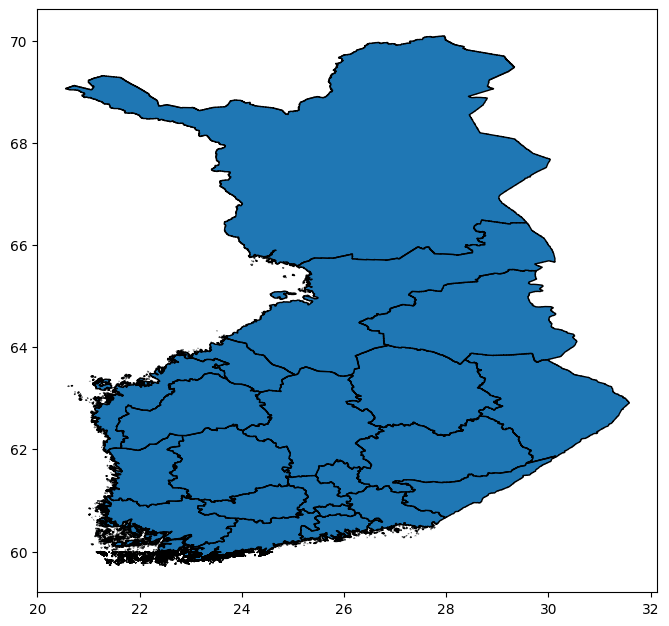

In [ ]:
# Generar el mapa por regiones

fi_mapa.plot(figsize = (8,8), edgecolor="black")

In [ ]:
# Convertir las coordenadas
obvs_points = gpd.points_from_xy(df.decimalLongitude, df.decimalLatitude)

#Crear un geodataframe en base a un dataframe
obvs_gdf = gpd.GeoDataFrame(df, geometry=obvs_points)
obvs_gdf.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,scientificName,countryCode,decimalLatitude,decimalLongitude,eventDate,taxonKey,speciesKey,issue,Categoría,geometry
0,3916717560,7585b2f0-0150-4409-985d-7b57832e3dca,MGYA00198885_Bacteria::Verrucomicrobia:Opituta...,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,Opitutaceae,Opitutus,NaN,...,"Opitutus Chin et al., 2001",FI,60.746,21.689,2016-07-25,3229020,NaN,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...,tipo_1,POINT (21.68900 60.74600)
1,3916717559,7585b2f0-0150-4409-985d-7b57832e3dca,MGYA00198894_Bacteria::Proteobacteria:Zetaprot...,Bacteria,Proteobacteria,Zetaproteobacteria,Mariprofundales,Mariprofundaceae,Mariprofundus,NaN,...,"Mariprofundus Emerson et al., 2010",FI,60.425,23.000,2016-07-25,5905993,NaN,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...,tipo_3,POINT (23.00000 60.42500)
2,3916717558,7585b2f0-0150-4409-985d-7b57832e3dca,MGYA00198886_Bacteria::Actinobacteria:Actinoba...,Bacteria,Actinobacteriota,Actinomycetia,Actinomycetales,Microbacteriaceae,Leifsonia,NaN,...,"Leifsonia Evtushenko et al., 2000",FI,60.425,23.000,2016-07-25,8159185,NaN,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...,tipo_3,POINT (23.00000 60.42500)
3,3916717557,7585b2f0-0150-4409-985d-7b57832e3dca,MGYA00198897_Bacteria::Actinobacteria:Nitrilir...,Bacteria,Actinobacteriota,Actinomycetia,NaN,NaN,NaN,NaN,...,Nitriliruptoria,FI,60.426,22.992,2016-07-25,10900290,NaN,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...,tipo_3,POINT (22.99200 60.42600)
4,3916717556,7585b2f0-0150-4409-985d-7b57832e3dca,MGYA00198890_Bacteria::Actinobacteria:Actinoba...,Bacteria,Actinobacteriota,Actinomycetia,Mycobacteriales,Pseudonocardiaceae,Allokutzneria,Allokutzneria albata,...,"Allokutzneria albata (Tomita et al., 1993) Lab...",FI,60.559,22.640,2016-07-25,8374936,8374936.0,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...,tipo_2,POINT (22.64000 60.55900)


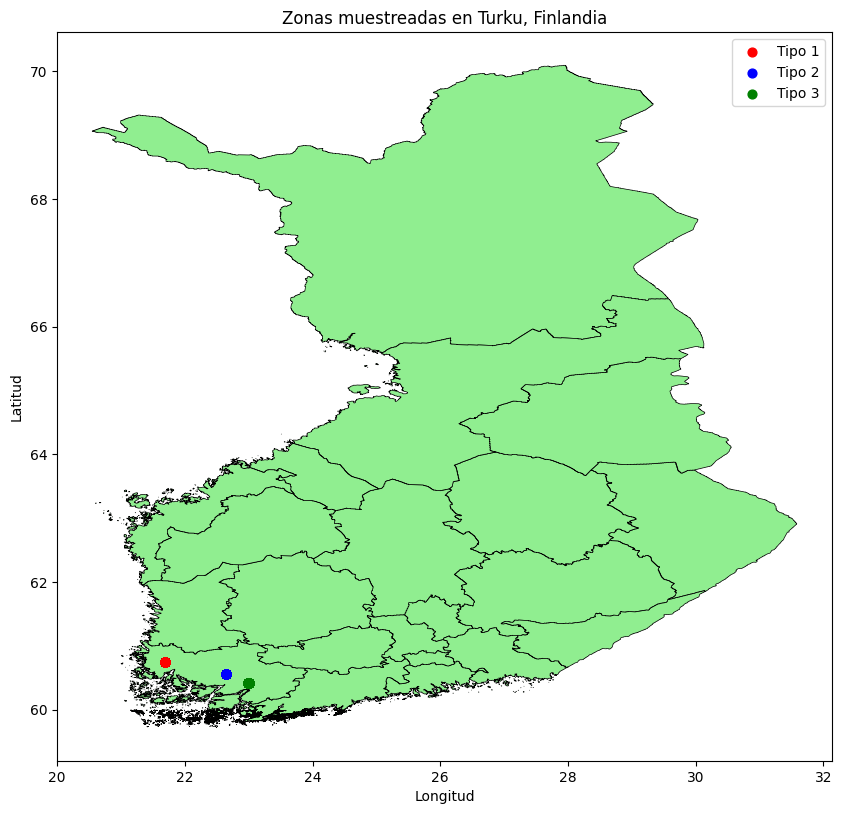

In [ ]:
# Filtrar observaciones por calidad
filtered_1 = obvs_gdf[obvs_gdf['Categoría'] == 'tipo_1']
filtered_2 = obvs_gdf[obvs_gdf['Categoría'] == 'tipo_2']
filtered_3 = obvs_gdf[obvs_gdf['Categoría'] == 'tipo_3']


# Lienzo
prov_map = fi_mapa
lienzo = prov_map.plot(
    figsize=(10, 10),
    color="lightgreen",
    edgecolor="black",
    linewidth=0.5
)

# Título
title = "Zonas muestreadas en Turku, Finlandia"
lienzo.set_title(title)

# Ejes
lienzo.set_xlabel("Longitud")
lienzo.set_ylabel("Latitud")

# Calidades
filtered_1.plot(ax=lienzo, color="red", label='Tipo 1', markersize=40)
filtered_2.plot(ax=lienzo, color="blue", label='Tipo 2', markersize=40)
filtered_3.plot(ax=lienzo, color="green", label='Tipo 3', markersize=40)


# Leyenda
lienzo.legend()

# Ver gráfico
plt.show()



---



**Bioindicadores de calidad del suelo de cafetales de Naranjo, Costa Rica.**





------ Filos ------\
Calidad Baja: Chloroflexota, GAL15. \
Calidad Media: Actinobacteriota, Proteobacteria.

------ Clases ------\
Calidad Baja: Acidobacteriae, TK10.\
Calidad Media: Actinomycetia, Gitt-GS-136.\

------ Géneros ------\
Calidad Baja: HSB OF53-F07, Acidibacter.\
Calidad Media: mle1-7, Hyphomicrobium, Pedomicrobium, Gaiella. \

---




**Filos**

In [ ]:
# Calcular la matriz de contingencia para Filo, muestra el conteo de combinaciones entre dos variables
contingencia = pd.crosstab(df['Categoría'], df['phylum'])

# Convertirla en una matriz de proporciones
proporciones = contingencia.div(contingencia.sum(axis=1), axis=0)

# Calcular la diferencia de proporciones
diferencias = proporciones.iloc[0] - proporciones.iloc[1]

# Seleccionar los 5 valores con mayor diferencia absoluta
top_5_diferencias = diferencias.abs().nlargest(5).index
print("Los 5 filos más distintos son:", top_5_diferencias)

Los 5 filos más distintos son: Index(['Ascomycota', 'Proteobacteria', 'Ciliophora', 'Actinobacteriota',
       'Verrucomicrobiota'],
      dtype='object', name='phylum')


<Figure size 1000x2000 with 0 Axes>

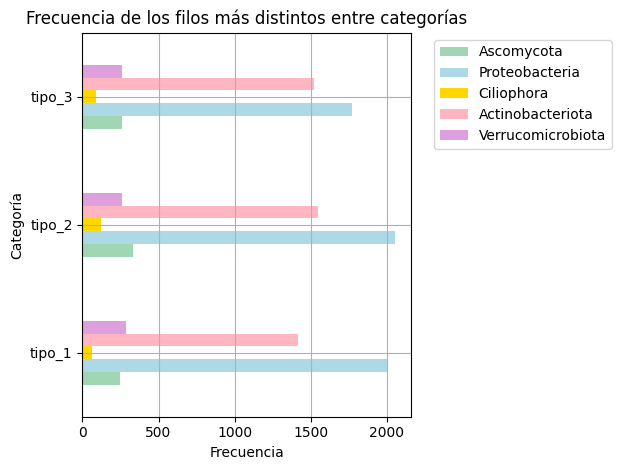

In [ ]:
# Filtrar el DataFrame
g_1 = df[df['phylum'] == 'Ascomycota']
g_2 = df[df['phylum'] == 'Proteobacteria']
g_3 = df[df['phylum'] == 'Ciliophora']
g_4 = df[df['phylum'] == 'Actinobacteriota']
g_5 = df[df['phylum'] == 'Verrucomicrobiota']

# Contar la cantidad en cada categoría
conteo_1 = g_1.groupby("Categoría").size()
conteo_2 = g_2.groupby("Categoría").size()
conteo_3 = g_3.groupby("Categoría").size()
conteo_4 = g_4.groupby("Categoría").size()
conteo_5 = g_5.groupby("Categoría").size()

# Combinar los conteos en un solo DataFrame
conteo_combinado = pd.concat([conteo_1, conteo_2, conteo_3, conteo_4, conteo_5], axis=1)
 # Renombrar las columnas
conteo_combinado.columns = ['Ascomycota', 'Proteobacteria', 'Ciliophora', 'Actinobacteriota', 'Verrucomicrobiota']

# Tamaño del gráfico
plt.figure(figsize=(10, 20))

# Crear gráfico de barras horizontal
conteo_combinado.plot(kind='barh', color=["#a0d6b4", "#add8e6", "#ffd700", "#ffb6c1", "#dda0dd"])

# Título
plt.title('Frecuencia de los filos más distintos entre categorías')

# Etiqueta del eje Y
plt.ylabel('Categoría')

# Etiqueta del eje X
plt.xlabel('Frecuencia')

# Añadir cuadrícula
plt.grid()

# Mostrar leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar diseño para que la leyenda no se corte
plt.tight_layout()

# Mostrar gráfico
plt.show()

------ **Filos de Naranjo** ------\
Calidad Baja: Chloroflexota, GAL15. \
Calidad Media: Actinobacteriota, Proteobacteria

---






**Clases**

In [ ]:
# Calcular la matriz de contingencia para Clase
contingencia = pd.crosstab(df['Categoría'], df['class'])

# Convertirla en una matriz de proporciones
proporciones = contingencia.div(contingencia.sum(axis=1), axis=0)

# Calcular la diferencia de proporciones
diferencias = proporciones.iloc[0] - proporciones.iloc[1]

# Seleccionar los 5 valores con mayor diferencia absoluta
top_5_diferencias = diferencias.abs().nlargest(5).index
print("Las 5 clases más distintos son:", top_5_diferencias)

Las 5 clases más distintos son: Index(['Actinomycetia', 'Alphaproteobacteria', 'Sordariomycetes',
       'Verrucomicrobiae', 'Gammaproteobacteria'],
      dtype='object', name='class')


<Figure size 1000x2000 with 0 Axes>

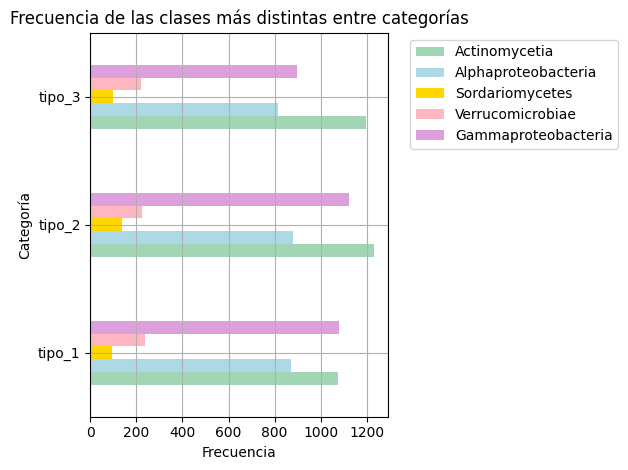

In [ ]:
# Filtrar el DataFrame
g_1 = df[df['class'] == 'Actinomycetia']
g_2 = df[df['class'] == 'Alphaproteobacteria']
g_3 = df[df['class'] == 'Sordariomycetes']
g_4 = df[df['class'] == 'Verrucomicrobiae']
g_5 = df[df['class'] == 'Gammaproteobacteria']

# Contar la cantidad en cada categoría
conteo_1 = g_1.groupby("Categoría").size()
conteo_2 = g_2.groupby("Categoría").size()
conteo_3 = g_3.groupby("Categoría").size()
conteo_4 = g_4.groupby("Categoría").size()
conteo_5 = g_5.groupby("Categoría").size()

# Combinar los conteos en un solo DataFrame
conteo_combinado = pd.concat([conteo_1, conteo_2, conteo_3, conteo_4, conteo_5], axis=1)
 # Renombrar las columnas
conteo_combinado.columns = ['Actinomycetia', 'Alphaproteobacteria', 'Sordariomycetes', 'Verrucomicrobiae', 'Gammaproteobacteria']

# Tamaño del gráfico
plt.figure(figsize=(10, 20))

# Crear gráfico de barras horizontal
conteo_combinado.plot(kind='barh', color=["#a0d6b4", "#add8e6", "#ffd700", "#ffb6c1", "#dda0dd"])

# Título
plt.title('Frecuencia de las clases más distintas entre categorías')

# Etiqueta del eje Y
plt.ylabel('Categoría')

# Etiqueta del eje X
plt.xlabel('Frecuencia')

# Añadir cuadrícula
plt.grid()

# Mostrar leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar diseño para que la leyenda no se corte
plt.tight_layout()

# Mostrar gráfico
plt.show()

------ **Clases de Naranjo** ------\
Calidad Baja: Acidobacteriae, TK10.\
Calidad Media: Actinomycetia, Gitt-GS-136.


---



**Géneros**

In [ ]:
# Calcular la matriz de contingencia para Género
contingencia = pd.crosstab(df['Categoría'], df['genus'])

# Convertirla en una matriz de proporciones
proporciones = contingencia.div(contingencia.sum(axis=1), axis=0)

# Calcular la diferencia de proporciones
diferencias = proporciones.iloc[0] - proporciones.iloc[1]

# Seleccionar los 5 valores con mayor diferencia absoluta
top_5_diferencias = diferencias.abs().nlargest(5).index
print("Los 5 géneros más distintos son:", top_5_diferencias)

Los 5 géneros más distintos son: Index(['Arthrobacter', 'Devosia', 'Ktedonobacter', 'Streptosporangium',
       'Actinoplanes'],
      dtype='object', name='genus')


<Figure size 1000x2000 with 0 Axes>

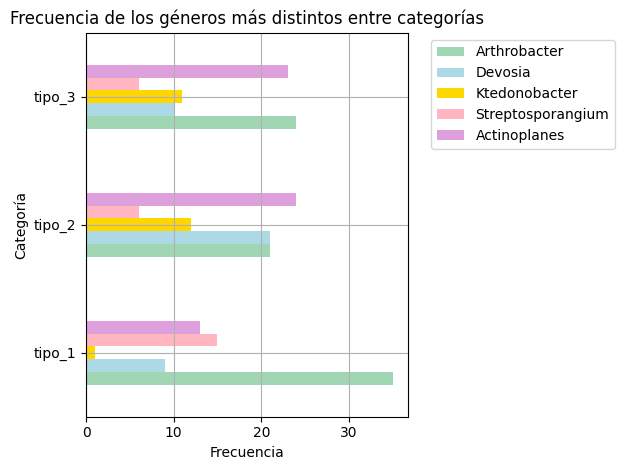

In [ ]:
# Filtrar el DataFrame
g_1 = df[df['genus'] == 'Arthrobacter']
g_2 = df[df['genus'] == 'Devosia']
g_3 = df[df['genus'] == 'Ktedonobacter']
g_4 = df[df['genus'] == 'Streptosporangium']
g_5 = df[df['genus'] == 'Actinoplanes']

# Contar la cantidad en cada categoría
conteo_1 = g_1.groupby("Categoría").size()
conteo_2 = g_2.groupby("Categoría").size()
conteo_3 = g_3.groupby("Categoría").size()
conteo_4 = g_4.groupby("Categoría").size()
conteo_5 = g_5.groupby("Categoría").size()

# Combinar los conteos en un solo DataFrame
conteo_combinado = pd.concat([conteo_1, conteo_2, conteo_3, conteo_4, conteo_5], axis=1)
 # Renombrar las columnas
conteo_combinado.columns = ['Arthrobacter', 'Devosia', 'Ktedonobacter', 'Streptosporangium', 'Actinoplanes']

# Tamaño del gráfico
plt.figure(figsize=(10, 20))

# Crear gráfico de barras horizontal
conteo_combinado.plot(kind='barh', color=["#a0d6b4", "#add8e6", "#ffd700", "#ffb6c1", "#dda0dd"])

# Título
plt.title('Frecuencia de los géneros más distintos entre categorías')

# Etiqueta del eje Y
plt.ylabel('Categoría')

# Etiqueta del eje X
plt.xlabel('Frecuencia')

# Añadir cuadrícula
plt.grid()

# Mostrar leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar diseño para que la leyenda no se corte
plt.tight_layout()

# Mostrar gráfico
plt.show()

------ **Géneros de Naranjo** ------\
Calidad Baja: HSB OF53-F07, Acidibacter.\
Calidad Media: mle1-7, Hyphomicrobium, Pedomicrobium, Gaiella. \





<Figure size 1000x1000 with 0 Axes>

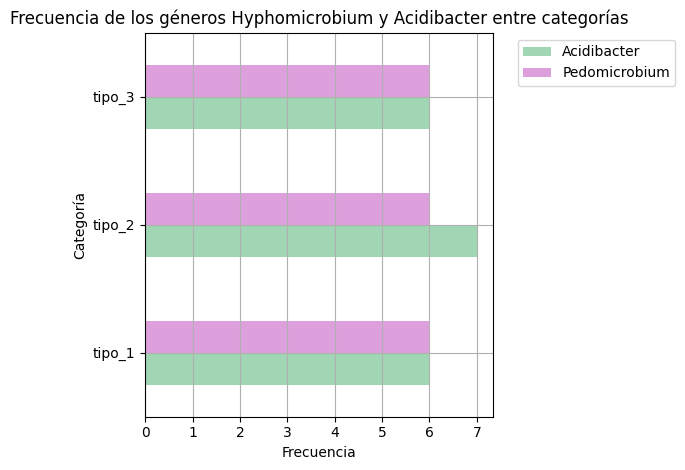

In [ ]:
# Filtrar el DataFrame por los géneros de Naranjo con mayor diferencia entre categorías.
aci_g = df[df['genus'] == 'Acidibacter']
hyp_g = df[df['genus'] == 'Hyphomicrobium']

# Contar la cantidad en cada categoría
conteo_aci_g = aci_g.groupby("Categoría").size()
conteo_hyp_g = hyp_g.groupby("Categoría").size()

# Combinar los conteos en un solo DataFrame
conteo_combinado = pd.concat([conteo_aci_g, conteo_hyp_g], axis=1)
 # Renombrar las columnas
conteo_combinado.columns = ['Acidibacter', 'Hyphomicrobium']

# Tamaño del gráfico
plt.figure(figsize=(10, 10))

# Crear gráfico de barras horizontal
conteo_combinado.plot(kind='barh', color=["#a0d6b4", "#dda0dd"])

# Título
plt.title('Frecuencia de los géneros Hyphomicrobium y Acidibacter entre categorías')

# Etiqueta del eje Y
plt.ylabel('Categoría')

# Etiqueta del eje X
plt.xlabel('Frecuencia')

# Añadir cuadrícula
plt.grid()

# Mostrar leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar diseño para que la leyenda no se corte
plt.tight_layout()

# Mostrar gráfico
plt.show()

# **Conclusiones:**

•	El dataset tiene poca información que permita analizar adecuadamente los suelos considerados saludables y no saludables, debido a que no se indican esas categorías para los datos, pero para realizar el ejercicio funcionó muy bien, debido a que se logró filtrar y limpiar la información.\
•	Es evidente que las muestras procesadas en los tres sitios de Finlandia, presentan diferencias en la estructura del microbioma del suelo.\
•	El género fue el nivel taxonómico con mayor resolución para representar las diferencias entre los tres sitios, brindando un análisis más detallado.\
•	A pesar de que se esperaba que la estructura de los microorganismos del suelo de Costa Rica y Finlandia fuera muy diferente, por su naturaleza y método de análisis; se presentan similitudes en la importancia de taxones como Proteobacteria, Actinobacteriota y Actinomycetia.


# **Referencias:**

Berihu, M., Somera, T. S., Malik, A., Medina, S., Piombo, E., Tal, O., ... & Freilich, S. (2023). A framework for the targeted recruitment of crop-beneficial soil taxa based on network analysis of metagenomics data. Microbiome, 11(1), 8.

Edwin, N. R., Fitzpatrick, A. H., Brennan, F., Abram, F., & O’Sullivan, O. (2024). An in-depth evaluation of metagenomic classifiers for soil microbiomes. Environmental Microbiome, 19(1), 19.

Hermans, S. M., Buckley, H. L., Case, B. S., Curran-Cournane, F., Taylor, M., & Lear, G. (2020). Using soil bacterial communities to predict physico-chemical variables and soil quality. Microbiome, 8, 1-13.

Instituto Nacional de Tecnología Agropecuaria. (2019). Zonificación Agroecológica para el	 cantón de Naranjo de Alajuela. Recuperado de http://www.platicar.go.cr/images/buscador/documents/pdf/2019/Memoria_Tecnica_NARANJO_Comp_ed.pdf \

MGnify (2020). Soil metagenome from healthy and unhealthy agricultural soil. Sampling event dataset https://doi.org/10.15468/rguc4r accessed via GBIF.org on 2024-06-04.

Plassart, P., Prévost-Bouré, N. C., Uroz, S., Dequiedt, S., Stone, D., Creamer, R., ... & Lemanceau, P.	 (2019). Soil parameters, land use, and geographical distance drive soil bacterial communities	 along a European transect. Scientific reports, 9(1), 1-17.